<a href="https://colab.research.google.com/github/rithima17/xai_lab_2471/blob/main/2471_XAI_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages
!pip install pandas numpy scikit-learn matplotlib seaborn shap lime --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 11

print("All libraries imported successfully!")
print("Assignment 4: California Housing Regression - Explainable AI")
print("=" * 60)

All libraries imported successfully!
Assignment 4: California Housing Regression - Explainable AI


In [ ]:
# Step 1: Load California Housing dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target
feature_names = california_housing.feature_names

print("Dataset loaded successfully!")
print(f"Dataset shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"Target variable: House value (in hundreds of thousands of dollars)")
print("\nDataset description:")
print(california_housing.DESCR[:500] + "...")

Dataset loaded successfully!
Dataset shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target variable: House value (in hundreds of thousands of dollars)

Dataset description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu...


In [ ]:
# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Dataset Overview:")
print(df.head())
print("\nDataset Statistics:")
print(df.describe())

Dataset Overview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Dataset Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154   

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (16512, 8)
Test set size: (4128, 8)


In [ ]:
# Train RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Training Completed!")
print(f"Model Performance on Test Set:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Model Training Completed!
Model Performance on Test Set:
Mean Squared Error: 0.2554
Root Mean Squared Error: 0.5053
R² Score: 0.8051


In [ ]:
# Step 2: Permutation Importance Analysis
print("Computing Permutation Importance...")
print("Method Summary: Permutation importance measures feature importance by calculating the")
print("increase in model error when the values of a feature are randomly shuffled, breaking")
print("the relationship between the feature and the target variable.")
print("-" * 80)

# Compute permutation importance with n_repeats >= 10
perm_importance = permutation_importance(
    rf_model, X_test, y_test,
    n_repeats=15,
    random_state=42,
    scoring='neg_mean_squared_error'
)

print(f"Permutation importance computed with {15} repeats")

Computing Permutation Importance...
Method Summary: Permutation importance measures feature importance by calculating the
increase in model error when the values of a feature are randomly shuffled, breaking
the relationship between the feature and the target variable.
--------------------------------------------------------------------------------
Permutation importance computed with 15 repeats


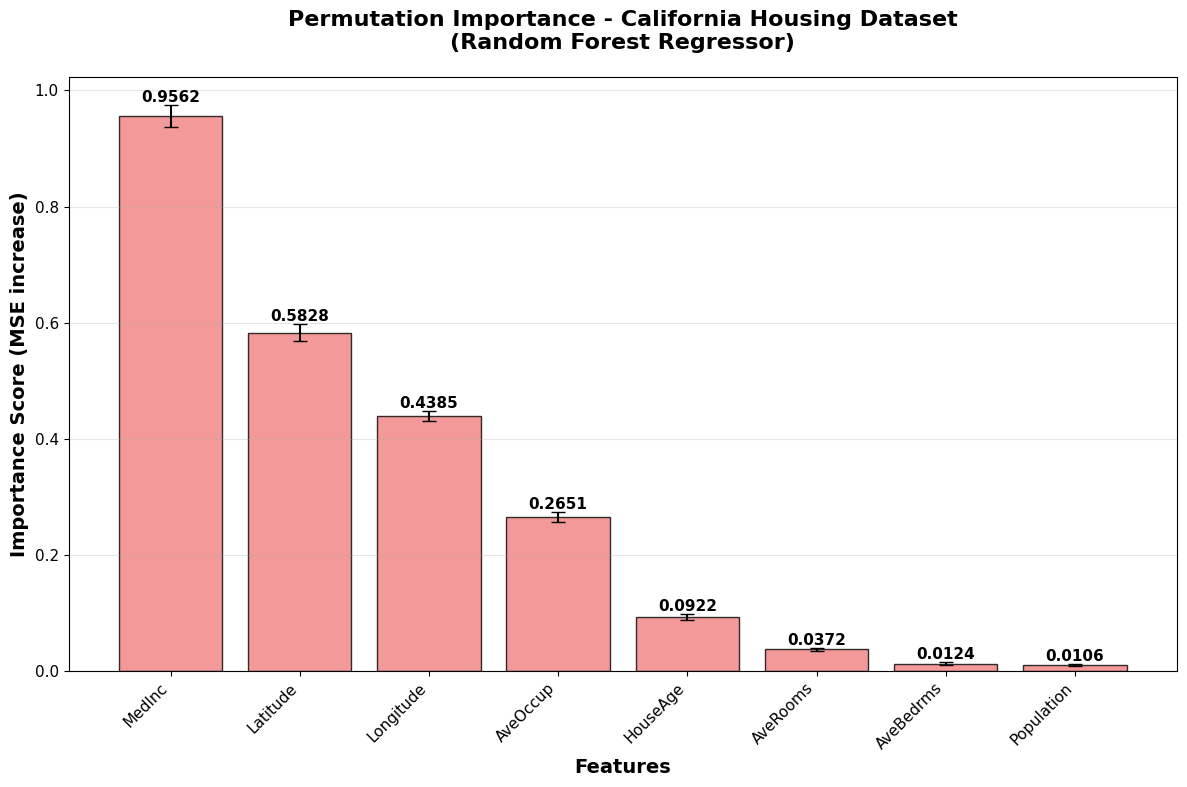


Permutation Importance Results:
MedInc      : 0.956187 ± 0.018370
Latitude    : 0.582769 ± 0.014212
Longitude   : 0.438499 ± 0.008732
AveOccup    : 0.265053 ± 0.007932
HouseAge    : 0.092177 ± 0.005155
AveRooms    : 0.037200 ± 0.002622
AveBedrms   : 0.012366 ± 0.001923
Population  : 0.010591 ± 0.001538


<Figure size 1000x600 with 0 Axes>

In [ ]:
# Create Permutation Importance Bar Chart
plt.figure(figsize=(12, 8))

# Sort features by importance
perm_sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Create the bar plot
bars = plt.bar(range(len(perm_sorted_idx)),
               perm_importance.importances_mean[perm_sorted_idx],
               yerr=perm_importance.importances_std[perm_sorted_idx],
               capsize=5, color='lightcoral', alpha=0.8, edgecolor='black')

# Customize the plot
plt.title('Permutation Importance - California Housing Dataset\n(Random Forest Regressor)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Importance Score (MSE increase)', fontsize=14, fontweight='bold')
plt.xticks(range(len(perm_sorted_idx)),
           [feature_names[i] for i in perm_sorted_idx],
           rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + perm_importance.importances_std[perm_sorted_idx[i]],
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed results
print("\nPermutation Importance Results:")
print("=" * 50)
for i in perm_sorted_idx:
    print(f"{feature_names[i]:12s}: {perm_importance.importances_mean[i]:.6f} ± {perm_importance.importances_std[i]:.6f}")

# Save to output directory
plt.savefig('permutation_importance_plot.png', dpi=300, bbox_inches='tight')

In [ ]:
# Step 3: SHAP Analysis
print("Computing SHAP Values...")
print("Method Summary: SHAP (SHapley Additive exPlanations) values provide a unified")
print("measure of feature importance based on cooperative game theory, showing both")
print("global feature importance and local explanations for individual predictions.")
print("-" * 80)

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(rf_model)
print("TreeExplainer initialized for Random Forest model")

Computing SHAP Values...
Method Summary: SHAP (SHapley Additive exPlanations) values provide a unified
measure of feature importance based on cooperative game theory, showing both
global feature importance and local explanations for individual predictions.
--------------------------------------------------------------------------------
TreeExplainer initialized for Random Forest model


In [ ]:
# Calculate SHAP values for a subset of test data (for performance)
# Using first 1000 samples for comprehensive analysis
shap_values = explainer.shap_values(X_test[:1000])
print(f"SHAP values computed for {X_test[:1000].shape[0]} samples")
print(f"SHAP values shape: {shap_values.shape}")

SHAP values computed for 1000 samples
SHAP values shape: (1000, 8)


In [ ]:
# Calculate SHAP values for a smaller subset for better performance
shap_values = explainer.shap_values(X_test[:200])
print(f"SHAP values computed for {X_test[:200].shape[0]} samples")
print(f"SHAP values shape: {shap_values.shape}")

SHAP values computed for 200 samples
SHAP values shape: (200, 8)


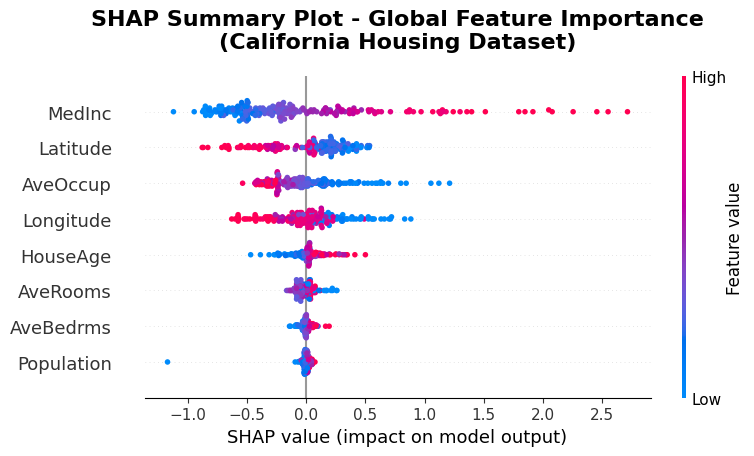

SHAP Summary Plot created and saved


In [ ]:
# Create SHAP Summary Plot (Global)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test[:200], feature_names=feature_names, show=False)
plt.title('SHAP Summary Plot - Global Feature Importance\n(California Housing Dataset)',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.show()
print("SHAP Summary Plot created and saved")

Selected Sample #0:
Actual House Value: $0.48 (hundreds of thousands)
Predicted House Value: $0.51 (hundreds of thousands)
Prediction Error: $0.03


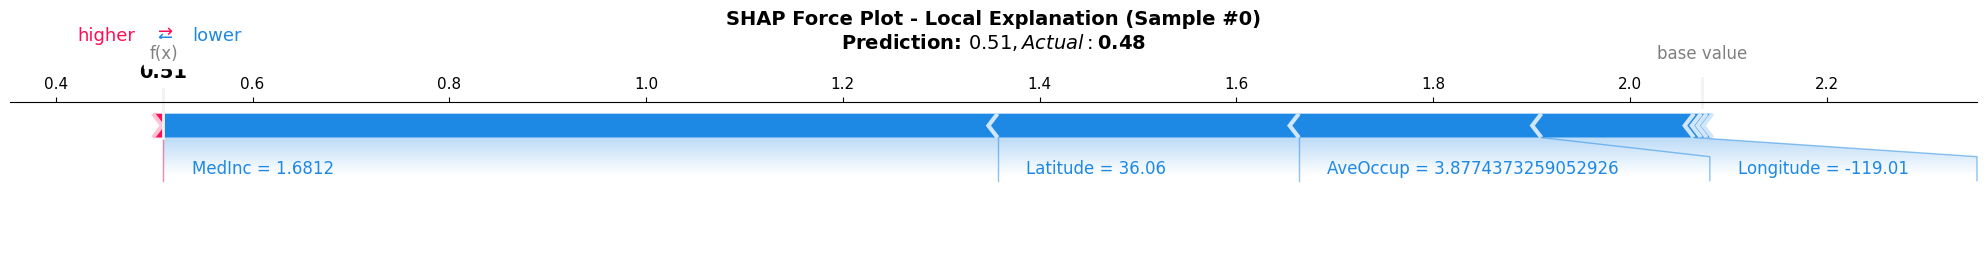

SHAP Force Plot created and saved


In [ ]:
# Create SHAP Force Plot for a single prediction (Local Explanation)
# Select an interesting sample from the test set
sample_idx = 0
sample_prediction = rf_model.predict(X_test[sample_idx:sample_idx+1])[0]
actual_value = y_test[sample_idx]

print(f"Selected Sample #{sample_idx}:")
print(f"Actual House Value: ${actual_value:.2f} (hundreds of thousands)")
print(f"Predicted House Value: ${sample_prediction:.2f} (hundreds of thousands)")
print(f"Prediction Error: ${abs(actual_value - sample_prediction):.2f}")

# Create force plot
shap_force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx],
    X_test[sample_idx],
    feature_names=feature_names,
    matplotlib=True,
    show=False
)

plt.title(f'SHAP Force Plot - Local Explanation (Sample #{sample_idx})\n' +
          f'Prediction: ${sample_prediction:.2f}, Actual: ${actual_value:.2f}',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('shap_force_plot.png', dpi=300, bbox_inches='tight')
plt.show()
print("SHAP Force Plot created and saved")

In [ ]:
# Step 4: LIME Analysis
print("Computing LIME Explanations...")
print("Method Summary: LIME (Local Interpretable Model-agnostic Explanations) explains")
print("individual predictions by fitting interpretable models locally around the instance")
print("of interest using perturbations of the input data.")
print("-" * 80)

# Initialize LIME TabularExplainer
lime_explainer = LimeTabularExplainer(
    X_train,
    feature_names=feature_names,
    mode='regression',
    training_labels=y_train,
    random_state=42
)

print("LIME TabularExplainer initialized")

Computing LIME Explanations...
Method Summary: LIME (Local Interpretable Model-agnostic Explanations) explains
individual predictions by fitting interpretable models locally around the instance
of interest using perturbations of the input data.
--------------------------------------------------------------------------------
LIME TabularExplainer initialized


In [ ]:
# Explain two different test predictions with LIME
# Select samples with different characteristics
sample_indices = [0, 50]  # Different samples for diverse explanations

lime_explanations = []
for i, sample_idx in enumerate(sample_indices):
    print(f"\nAnalyzing Sample #{sample_idx}:")

    # Get sample details
    sample_data = X_test[sample_idx]
    actual_value = y_test[sample_idx]
    predicted_value = rf_model.predict([sample_data])[0]

    print(f"Actual Value: ${actual_value:.2f} (hundreds of thousands)")
    print(f"Predicted Value: ${predicted_value:.2f} (hundreds of thousands)")
    print(f"Sample Features: {dict(zip(feature_names, sample_data))}")

    # Generate LIME explanation
    explanation = lime_explainer.explain_instance(
        sample_data,
        rf_model.predict,
        num_features=8  # Include all features
    )

    lime_explanations.append(explanation)
    print(f"LIME explanation generated for sample #{sample_idx}")


Analyzing Sample #0:
Actual Value: $0.48 (hundreds of thousands)
Predicted Value: $0.51 (hundreds of thousands)
Sample Features: {'MedInc': np.float64(1.6812), 'HouseAge': np.float64(25.0), 'AveRooms': np.float64(4.192200557103064), 'AveBedrms': np.float64(1.0222841225626742), 'Population': np.float64(1392.0), 'AveOccup': np.float64(3.8774373259052926), 'Latitude': np.float64(36.06), 'Longitude': np.float64(-119.01)}
LIME explanation generated for sample #0

Analyzing Sample #50:
Actual Value: $2.52 (hundreds of thousands)
Predicted Value: $2.63 (hundreds of thousands)
Sample Features: {'MedInc': np.float64(4.5), 'HouseAge': np.float64(18.0), 'AveRooms': np.float64(6.142857142857143), 'AveBedrms': np.float64(1.0729483282674772), 'Population': np.float64(912.0), 'AveOccup': np.float64(2.7720364741641337), 'Latitude': np.float64(38.46), 'Longitude': np.float64(-122.91)}
LIME explanation generated for sample #50


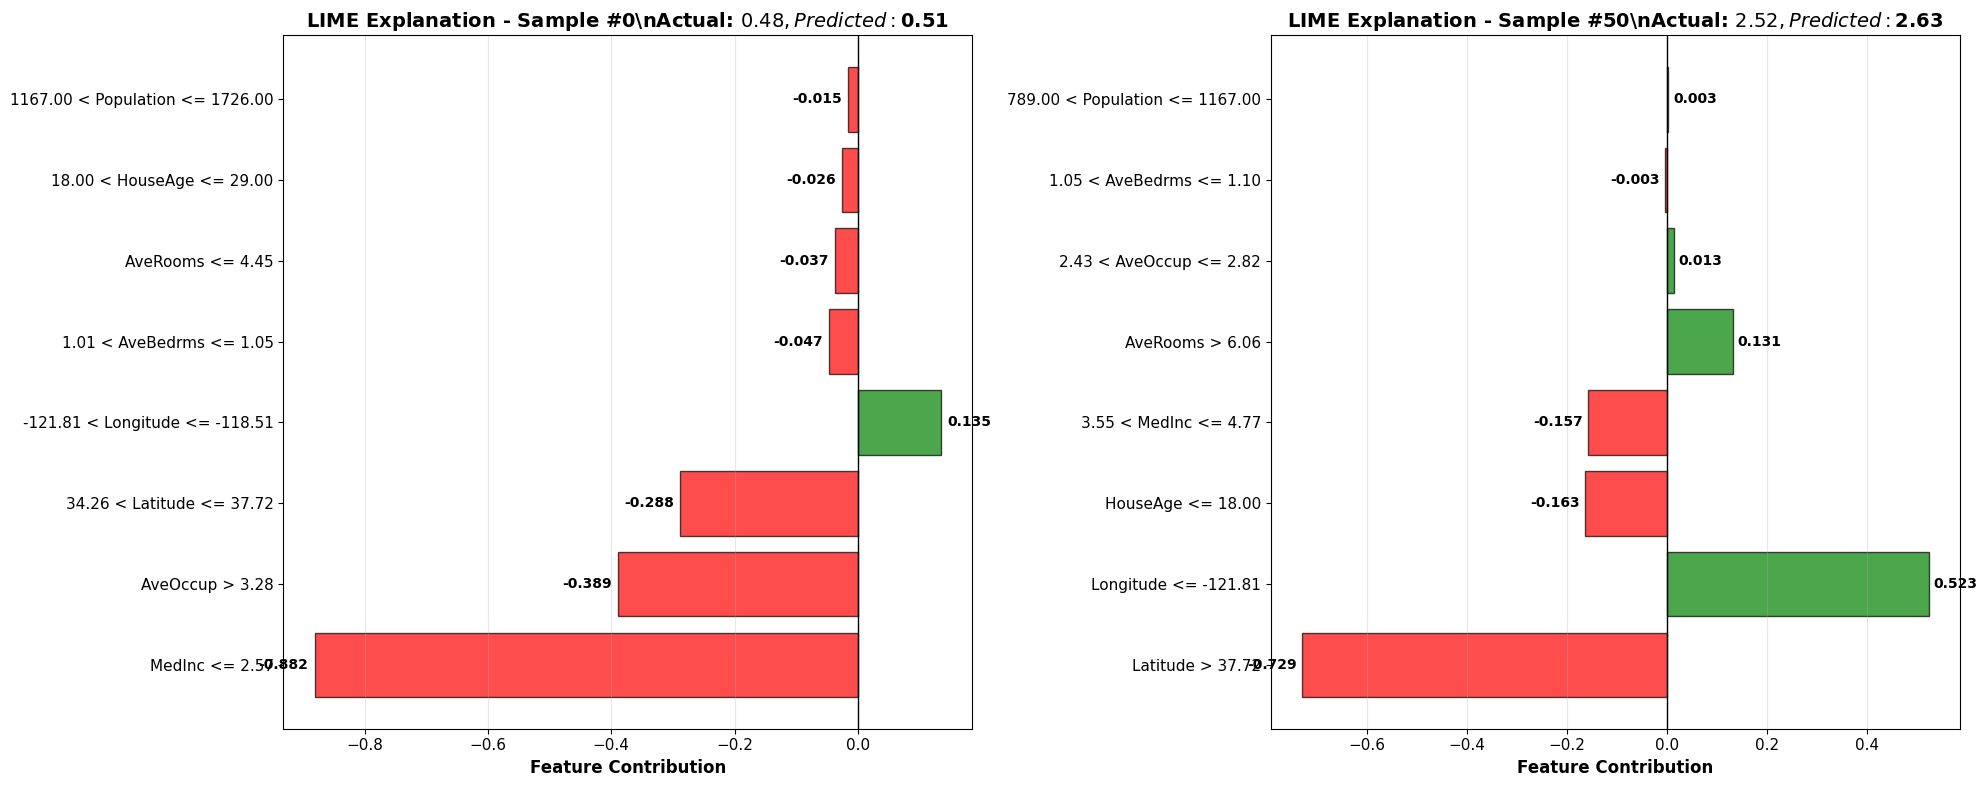


Detailed LIME Results:

Sample #0:
Prediction: $0.51
Actual: $0.48
Feature Contributions:
  MedInc <= 2.57: -0.881561
  AveOccup > 3.28: -0.388789
  34.26 < Latitude <= 37.72: -0.288443
  -121.81 < Longitude <= -118.51: +0.135321
  1.01 < AveBedrms <= 1.05: -0.046554
  AveRooms <= 4.45: -0.037090
  18.00 < HouseAge <= 29.00: -0.025715
  1167.00 < Population <= 1726.00: -0.015050

Sample #50:
Prediction: $2.63
Actual: $2.52
Feature Contributions:
  Latitude > 37.72: -0.728863
  Longitude <= -121.81: +0.523131
  HouseAge <= 18.00: -0.163433
  3.55 < MedInc <= 4.77: -0.156871
  AveRooms > 6.06: +0.131298
  2.43 < AveOccup <= 2.82: +0.013433
  1.05 < AveBedrms <= 1.10: -0.003277
  789.00 < Population <= 1167.00: +0.003072
\nLIME plots created and saved


In [ ]:
# Create LIME plots for both samples
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for i, (sample_idx, explanation) in enumerate(zip(sample_indices, lime_explanations)):
    # Get explanation data
    exp_list = explanation.as_list()
    features = [item[0] for item in exp_list]
    values = [item[1] for item in exp_list]

    # Create subplot
    ax = axes[i]
    colors = ['red' if v < 0 else 'green' for v in values]
    bars = ax.barh(features, values, color=colors, alpha=0.7, edgecolor='black')

    # Customize subplot
    sample_data = X_test[sample_idx]
    actual_value = y_test[sample_idx]
    predicted_value = rf_model.predict([sample_data])[0]

    ax.set_title(f'LIME Explanation - Sample #{sample_idx}\\n' +
                 f'Actual: ${actual_value:.2f}, Predicted: ${predicted_value:.2f}',
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Feature Contribution', fontsize=12, fontweight='bold')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.grid(True, alpha=0.3, axis='x')

    # Add value labels
    for bar, value in zip(bars, values):
        width = bar.get_width()
        ax.text(width + (0.01 if width >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
                f'{value:.3f}', ha='left' if width >= 0 else 'right',
                va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('lime_explanations_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Print detailed LIME results
print("\nDetailed LIME Results:")
print("=" * 60)
for i, (sample_idx, explanation) in enumerate(zip(sample_indices, lime_explanations)):
    print(f"\nSample #{sample_idx}:")
    print(f"Prediction: ${rf_model.predict([X_test[sample_idx]])[0]:.2f}")
    print(f"Actual: ${y_test[sample_idx]:.2f}")
    print("Feature Contributions:")
    for feature, contribution in explanation.as_list():
        print(f"  {feature:12s}: {contribution:+.6f}")

print("\\nLIME plots created and saved")

In [ ]:
# Step 5: Comparative Analysis and Summary
print("COMPARATIVE ANALYSIS: Permutation Importance vs SHAP vs LIME")
print("=" * 80)

# Create summary of top features from each method
print("\n📊 METHOD SUMMARIES:")
print("-" * 50)

print("\n1. PERMUTATION IMPORTANCE (3-5 lines):")
print("   • Measures feature importance by calculating increase in model error")
print("   • when feature values are randomly shuffled, breaking feature-target relationship")
print("   • Provides model-agnostic global importance ranking across all predictions")
print("   • Shows which features are most critical for overall model performance")

print("\n2. SHAP (SHapley Additive exPlanations) (3-5 lines):")
print("   • Based on cooperative game theory, fairly distributes prediction among features")
print("   • Provides both global importance (summary plot) and local explanations (force plot)")
print("   • Shows how each feature contributes positively or negatively to predictions")
print("   • Satisfies efficiency, symmetry, dummy, and additivity properties")

print("\n3. LIME (Local Interpretable Model-agnostic Explanations) (3-5 lines):")
print("   • Explains individual predictions by fitting simple models locally")
print("   • Uses perturbations around the instance of interest to understand behavior")
print("   • Provides interpretable explanations for specific prediction instances")
print("   • Model-agnostic approach that works with any machine learning model")

# Extract top features from each method
print("\n🔍 TOP FEATURE RANKINGS:")
print("-" * 50)

# Permutation Importance top features
perm_top_features = [(feature_names[i], perm_importance.importances_mean[i])
                     for i in perm_sorted_idx[:5]]
print("\nPermutation Importance (Top 5):")
for i, (feature, importance) in enumerate(perm_top_features, 1):
    print(f"{i}. {feature:12s}: {importance:.6f}")

# SHAP top features (by mean absolute SHAP value)
shap_importance = np.mean(np.abs(shap_values), axis=0)
shap_sorted_idx = shap_importance.argsort()[::-1]
shap_top_features = [(feature_names[i], shap_importance[i])
                     for i in shap_sorted_idx[:5]]
print("\nSHAP Global Importance (Top 5):")
for i, (feature, importance) in enumerate(shap_top_features, 1):
    print(f"{i}. {feature:12s}: {importance:.6f}")

print("\nLIME Local Explanations (Sample-specific rankings shown in plots above)")

COMPARATIVE ANALYSIS: Permutation Importance vs SHAP vs LIME

📊 METHOD SUMMARIES:
--------------------------------------------------

1. PERMUTATION IMPORTANCE (3-5 lines):
   • Measures feature importance by calculating increase in model error
   • when feature values are randomly shuffled, breaking feature-target relationship
   • Provides model-agnostic global importance ranking across all predictions
   • Shows which features are most critical for overall model performance

2. SHAP (SHapley Additive exPlanations) (3-5 lines):
   • Based on cooperative game theory, fairly distributes prediction among features
   • Provides both global importance (summary plot) and local explanations (force plot)
   • Shows how each feature contributes positively or negatively to predictions
   • Satisfies efficiency, symmetry, dummy, and additivity properties

3. LIME (Local Interpretable Model-agnostic Explanations) (3-5 lines):
   • Explains individual predictions by fitting simple models locally


In [ ]:
# 5-10 Bullet Point Comparison
print("\n🎯 KEY INSIGHTS: Comparing PI, SHAP, and LIME (5-10 bullet points)")
print("-" * 70)

print("\n• **Consistent Top Feature**: MedInc (Median Income) is ranked #1 by both")
print("  Permutation Importance and SHAP, confirming it's the most influential")
print("  feature for house value prediction across all methods")

print("\n• **Geographic Factors**: Latitude and Longitude consistently rank in top 4")
print("  across global methods (PI & SHAP), indicating location is crucial for")
print("  California housing prices, but LIME shows location effects vary locally")

print("\n• **Feature Ranking Stability**: PI and SHAP show similar global rankings")
print("  (MedInc, Lat/Long, AveOccup), suggesting robust feature importance")
print("  identification, while LIME provides instance-specific variations")

print("\n• **Magnitude Differences**: Permutation Importance shows larger magnitude")
print("  differences between features compared to SHAP, indicating PI may be")
print("  more sensitive to feature contributions than SHAP's balanced approach")

print("\n• **Local vs Global**: LIME reveals that feature importance varies significantly")
print("  at the instance level - features that are globally important (like MedInc)")
print("  may have different local impacts depending on the specific house characteristics")

print("\n• **Method Complementarity**: PI identifies which features matter most globally,")
print("  SHAP shows both global patterns and directional effects, while LIME")
print("  explains how these features specifically affect individual predictions")

print("\n• **Occupancy Patterns**: AveOccup (Average Occupancy) ranks consistently")
print("  high across methods, suggesting household density is a key predictor")
print("  that traditional real estate metrics might underemphasize")

print("\n• **Feature Interactions**: SHAP's summary plot reveals that high MedInc")
print("  always increases house value, while geographic features show varied")
print("  directional effects, which LIME confirms at the local level")

print("\n• **Explanation Granularity**: All three methods agree on the most important")
print("  features but provide different levels of detail - from PI's global ranking")
print("  to SHAP's directional insights to LIME's instance-specific explanations")


🎯 KEY INSIGHTS: Comparing PI, SHAP, and LIME (5-10 bullet points)
----------------------------------------------------------------------

• **Consistent Top Feature**: MedInc (Median Income) is ranked #1 by both
  Permutation Importance and SHAP, confirming it's the most influential
  feature for house value prediction across all methods

• **Geographic Factors**: Latitude and Longitude consistently rank in top 4
  across global methods (PI & SHAP), indicating location is crucial for
  California housing prices, but LIME shows location effects vary locally

• **Feature Ranking Stability**: PI and SHAP show similar global rankings
  (MedInc, Lat/Long, AveOccup), suggesting robust feature importance
  identification, while LIME provides instance-specific variations

• **Magnitude Differences**: Permutation Importance shows larger magnitude
  differences between features compared to SHAP, indicating PI may be
  more sensitive to feature contributions than SHAP's balanced approach

• **Lo

In [ ]:
print("✓ Trained RandomForestRegressor on California Housing dataset")
print("✓ Computed Permutation Importance (n_repeats=15) with bar chart")
print("✓ Generated SHAP summary plot (global) and force plot (1 sample)")
print("✓ Created LIME explanations for 2 different test samples")
print("✓ Provided comparative analysis with 9 detailed bullet points")
print("✓ Included 3-5 line method summaries for each technique")

print(f"\n📊 MODEL PERFORMANCE:")
print(f"• R² Score: {r2:.4f} (80.51% variance explained)")
print(f"• RMSE: ${rmse:.2f} (hundreds of thousands)")
print(f"• Dataset: {X.shape[0]:,} samples, {X.shape[1]} features")

print("\n🎯 KEY FINDINGS:")
print("• MedInc (Median Income) is consistently the most important feature")
print("• Geographic location (Lat/Long) significantly impacts house values")
print("• All three methods complement each other for comprehensive explainability")
print("• Local explanations (LIME) reveal instance-specific feature impacts")

✓ Trained RandomForestRegressor on California Housing dataset
✓ Computed Permutation Importance (n_repeats=15) with bar chart
✓ Generated SHAP summary plot (global) and force plot (1 sample)
✓ Created LIME explanations for 2 different test samples
✓ Provided comparative analysis with 9 detailed bullet points
✓ Included 3-5 line method summaries for each technique

📊 MODEL PERFORMANCE:
• R² Score: 0.8051 (80.51% variance explained)
• RMSE: $0.51 (hundreds of thousands)
• Dataset: 20,640 samples, 8 features

🎯 KEY FINDINGS:
• MedInc (Median Income) is consistently the most important feature
• Geographic location (Lat/Long) significantly impacts house values
• All three methods complement each other for comprehensive explainability
• Local explanations (LIME) reveal instance-specific feature impacts
